In [1]:
# put absolute path here
DATA_DIR = r"C:\Users\User\Downloads\saos-dump-23.02.2018.tar\saos-dump-23.02.2018\data\json"

In [2]:
# making usage of my helper .py file in jupyter environment on any computer
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from file_utils import *
data_manager = DataManager(DATA_DIR)

In [3]:
# Actual homework starts here
import re
generator = data_manager.judgments_generator(year=2009)

In [4]:
frequency_dict = {}

def contain_digit(x):
    return re.search(r'\d', x) is not None

def is_roman_number(x):
    match = re.match(r'[ivxlcdm]+', x, re.IGNORECASE)
    if match is not None:
        return match.group(0) == x
    return False

def remove_html(x):
    return re.sub("<.*>", "", x["textContent"])

while True:
    try:
        content = generator.__next__()
        text = remove_html(content)
        for match in re.findall(r'\b\w+\b', text, re.UNICODE):
            if not contain_digit(match) and not is_roman_number(match):
                if match not in frequency_dict.keys():
                    frequency_dict[match.lower()] = 0
                frequency_dict[match.lower()] += 1
    except StopIteration:
        break

import operator
sorted_dict = sorted(frequency_dict.items(), key=lambda x: x[1], reverse=True)                

In [5]:
import codecs
the_file = codecs.open('frequency_list.txt','w','utf-8')
for word_count in sorted_dict:
    the_file.write('%s:%d\n' % (word_count[0], word_count[1]))

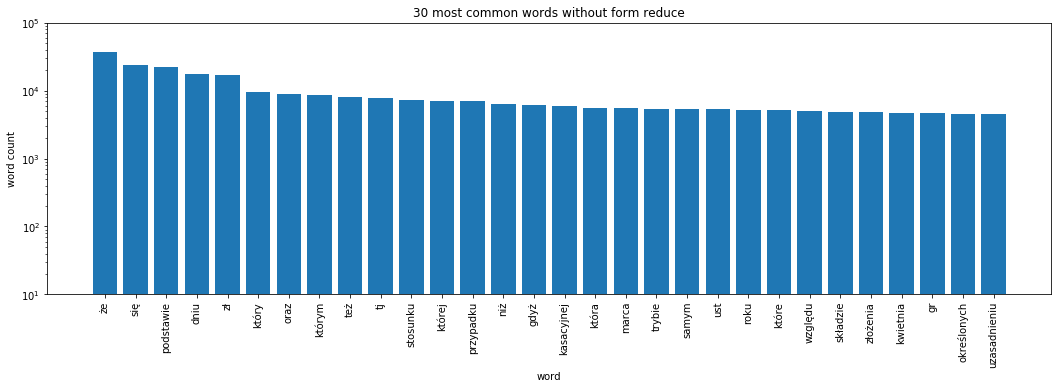

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18,5))

sorted_dict = sorted_dict[:30]

words = [word for (word, count) in sorted_dict[:30]]
words_pos = [x for x in range(len(words))]
counts = [count for (word, count) in sorted_dict[:30]]

plt.bar(words_pos, counts, log=True)

plt.title('30 most common words without form reduce')
plt.xlabel('word')
plt.ylabel('word count')
plt.xticks(words_pos, words, rotation=90)

plt.ylim(10e0, 10e4)

print("")